# Ejercicio de programación Regresión Lineal

In [214]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [215]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')

#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/canada_per_capita_income.csv')
data= np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/canada_per_capita_income.csv', delimiter=',')
data


array([[         nan,          nan],
       [ 1970.      ,  3399.299037],
       [ 1971.      ,  3768.297935],
       [ 1972.      ,  4251.175484],
       [ 1973.      ,  4804.463248],
       [ 1974.      ,  5576.514583],
       [ 1975.      ,  5998.144346],
       [ 1976.      ,  7062.131392],
       [ 1977.      ,  7100.12617 ],
       [ 1978.      ,  7247.967035],
       [ 1979.      ,  7602.912681],
       [ 1980.      ,  8355.96812 ],
       [ 1981.      ,  9434.390652],
       [ 1982.      ,  9619.438377],
       [ 1983.      , 10416.53659 ],
       [ 1984.      , 10790.32872 ],
       [ 1985.      , 11018.95585 ],
       [ 1986.      , 11482.89153 ],
       [ 1987.      , 12974.80662 ],
       [ 1988.      , 15080.28345 ],
       [ 1989.      , 16426.72548 ],
       [ 1990.      , 16838.6732  ],
       [ 1991.      , 17266.09769 ],
       [ 1992.      , 16412.08309 ],
       [ 1993.      , 15875.58673 ],
       [ 1994.      , 15755.82027 ],
       [ 1995.      , 16369.31725 ],
 

In [135]:
#X=data.iloc[:,0]
#y=data.iloc[:,1]
#m=y.size
#m

In [216]:
X, y = data[1:, 0], data[1:, 1]    #Fila,Columna subindices desde 0

m = y.size  # m = numero de ejemplos de entrenamiento
#X=X/1000

In [217]:
print(X)

[1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.]


In [218]:
# Normalizar los datos
X = (X - np.mean(X)) / np.std(X)

In [219]:
X

array([-1.6955825 , -1.62186152, -1.54814054, -1.47441956, -1.40069858,
       -1.32697761, -1.25325663, -1.17953565, -1.10581467, -1.03209369,
       -0.95837272, -0.88465174, -0.81093076, -0.73720978, -0.6634888 ,
       -0.58976782, -0.51604685, -0.44232587, -0.36860489, -0.29488391,
       -0.22116293, -0.14744196, -0.07372098,  0.        ,  0.07372098,
        0.14744196,  0.22116293,  0.29488391,  0.36860489,  0.44232587,
        0.51604685,  0.58976782,  0.6634888 ,  0.73720978,  0.81093076,
        0.88465174,  0.95837272,  1.03209369,  1.10581467,  1.17953565,
        1.25325663,  1.32697761,  1.40069858,  1.47441956,  1.54814054,
        1.62186152,  1.6955825 ])

In [220]:
#y=y/10000
print(y)

[ 3399.299037  3768.297935  4251.175484  4804.463248  5576.514583
  5998.144346  7062.131392  7100.12617   7247.967035  7602.912681
  8355.96812   9434.390652  9619.438377 10416.53659  10790.32872
 11018.95585  11482.89153  12974.80662  15080.28345  16426.72548
 16838.6732   17266.09769  16412.08309  15875.58673  15755.82027
 16369.31725  16699.82668  17310.75775  16622.67187  17581.02414
 18987.38241  18601.39724  19232.17556  22739.42628  25719.14715
 29198.05569  32738.2629   36144.48122  37446.48609  32755.17682
 38420.52289  42334.71121  42665.25597  42676.46837  41039.8936
 35175.18898  34229.19363 ]


In [221]:
print(X.size) #N° de datos del dataset
# Datos suficientes para generar los modelos

47


### 1.1 Trazar los datos

In [222]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Ingreso per capita')
    pyplot.xlabel('Año')


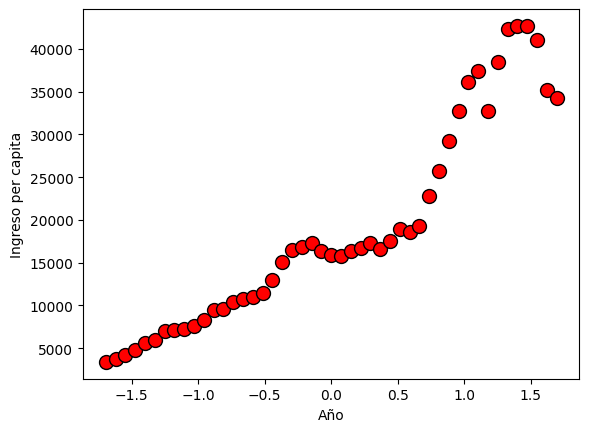

In [223]:
plotData(X, y)

In [224]:
#?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [225]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).
#La columna es de x0 que tiene el valor de 1
X = np.stack([np.ones(m), X], axis=1)

In [226]:
X

array([[ 1.        , -1.6955825 ],
       [ 1.        , -1.62186152],
       [ 1.        , -1.54814054],
       [ 1.        , -1.47441956],
       [ 1.        , -1.40069858],
       [ 1.        , -1.32697761],
       [ 1.        , -1.25325663],
       [ 1.        , -1.17953565],
       [ 1.        , -1.10581467],
       [ 1.        , -1.03209369],
       [ 1.        , -0.95837272],
       [ 1.        , -0.88465174],
       [ 1.        , -0.81093076],
       [ 1.        , -0.73720978],
       [ 1.        , -0.6634888 ],
       [ 1.        , -0.58976782],
       [ 1.        , -0.51604685],
       [ 1.        , -0.44232587],
       [ 1.        , -0.36860489],
       [ 1.        , -0.29488391],
       [ 1.        , -0.22116293],
       [ 1.        , -0.14744196],
       [ 1.        , -0.07372098],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.07372098],
       [ 1.        ,  0.14744196],
       [ 1.        ,  0.22116293],
       [ 1.        ,  0.29488391],
       [ 1.        ,

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [227]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    #J = 0
    h = np.dot(X, theta) #producto de x y theta también puede ser  theta*X
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [228]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
#print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
#print('Valor de costo esperado (aproximadamente)  54.24')
#print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
J = computeCost(X, y, theta=np.array([-0.8246, 1.3661]))
print('Con theta = [-2, 2]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 249861765.82
Con theta = [-1, 2]
 Costo calculado = 249858212.76
Con theta = [-2, 2]
 Costo calculado = 249862016.61


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [229]:
y.shape[0]

47

In [230]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    #alpha =0.001 0.005
    theta = theta.copy() #.copy -> evitar las referencias

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [231]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 18920.1317, 11237.8439
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


In [232]:
J_history

[245043370.93308046,
 240320862.10517415,
 235692331.20294324,
 231155908.06566656,
 226709759.74882182,
 222352089.7834822,
 218081137.4504529,
 213895177.06885082,
 209792517.2988427,
 205771500.45825768,
 201830501.85280037,
 197967929.11959156,
 194182221.58377367,
 190471849.62791857,
 186835314.07398495,
 183271145.5775746,
 179777904.03424287,
 176354177.99762338,
 172998584.10913265,
 169709766.53902292,
 166486396.43855834,
 163327171.40309298,
 160230814.9458334,
 157196075.98207328,
 154221728.323692,
 151306570.18371248,
 148449423.6907186,
 145649134.41293526,
 142904570.8917798,
 140214624.1846954,
 137578207.41708192,
 134994255.34314394,
 132461723.91547735,
 129979589.86322133,
 127546850.27860521,
 125162522.21172293,
 122825642.2733716,
 120535266.2457935,
 118290468.70116419,
 116090342.62767299,
 113933999.06304426,
 111820566.73535164,
 109749191.7109801,
 107719037.04959358,
 105729282.46596864,
 103779123.99855784,
 101867773.68464851,
 99994459.24198596,
 98158

Se utilizan los parametros finales para grafical la linea.

In [233]:
X

array([[ 1.        , -1.6955825 ],
       [ 1.        , -1.62186152],
       [ 1.        , -1.54814054],
       [ 1.        , -1.47441956],
       [ 1.        , -1.40069858],
       [ 1.        , -1.32697761],
       [ 1.        , -1.25325663],
       [ 1.        , -1.17953565],
       [ 1.        , -1.10581467],
       [ 1.        , -1.03209369],
       [ 1.        , -0.95837272],
       [ 1.        , -0.88465174],
       [ 1.        , -0.81093076],
       [ 1.        , -0.73720978],
       [ 1.        , -0.6634888 ],
       [ 1.        , -0.58976782],
       [ 1.        , -0.51604685],
       [ 1.        , -0.44232587],
       [ 1.        , -0.36860489],
       [ 1.        , -0.29488391],
       [ 1.        , -0.22116293],
       [ 1.        , -0.14744196],
       [ 1.        , -0.07372098],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.07372098],
       [ 1.        ,  0.14744196],
       [ 1.        ,  0.22116293],
       [ 1.        ,  0.29488391],
       [ 1.        ,

In [234]:
a=np.dot(X, theta)
a

array([ -134.55962855,   693.90521167,  1522.3700519 ,  2350.83489212,
        3179.29973235,  4007.76457257,  4836.22941279,  5664.69425302,
        6493.15909324,  7321.62393346,  8150.08877369,  8978.55361391,
        9807.01845413, 10635.48329436, 11463.94813458, 12292.41297481,
       13120.87781503, 13949.34265525, 14777.80749548, 15606.2723357 ,
       16434.73717592, 17263.20201615, 18091.66685637, 18920.13169659,
       19748.59653682, 20577.06137704, 21405.52621727, 22233.99105749,
       23062.45589771, 23890.92073794, 24719.38557816, 25547.85041838,
       26376.31525861, 27204.78009883, 28033.24493906, 28861.70977928,
       29690.1746195 , 30518.63945973, 31347.10429995, 32175.56914017,
       33004.0339804 , 33832.49882062, 34660.96366084, 35489.42850107,
       36317.89334129, 37146.35818152, 37974.82302174])

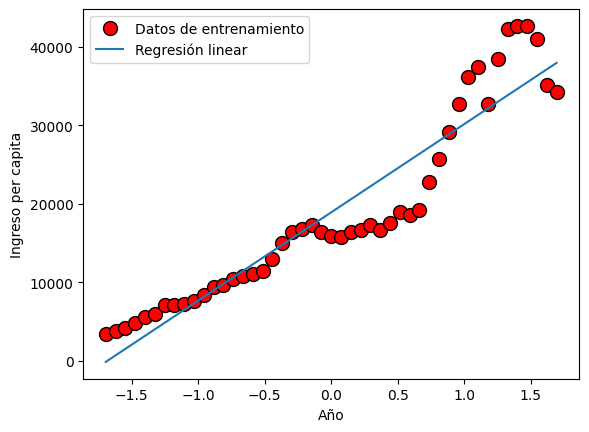

In [235]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [244]:
year = 2020

# Normalizar el año 2018 (usando la misma media y desviación estándar que usaste para normalizar los datos de entrenamiento)
X_norm = (year - np.mean(data[1:, 0])) / np.std(data[1:, 0])
X_norm
y_pred = theta[0] + theta[1] * X_norm

print(f"La predicción para el año {year} es: {y_pred}")

La predicción para el año 2020 es: 41288.682382633735


In [245]:
year = 2025

# Normalizar el año 2018 (usando la misma media y desviación estándar que usaste para normalizar los datos de entrenamiento)
X_norm = (year - np.mean(data[1:, 0])) / np.std(data[1:, 0])
X_norm
y_pred = theta[0] + theta[1] * X_norm

print(f"La predicción para el año {year} es: {y_pred}")

La predicción para el año 2025 es: 45431.00658375205


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

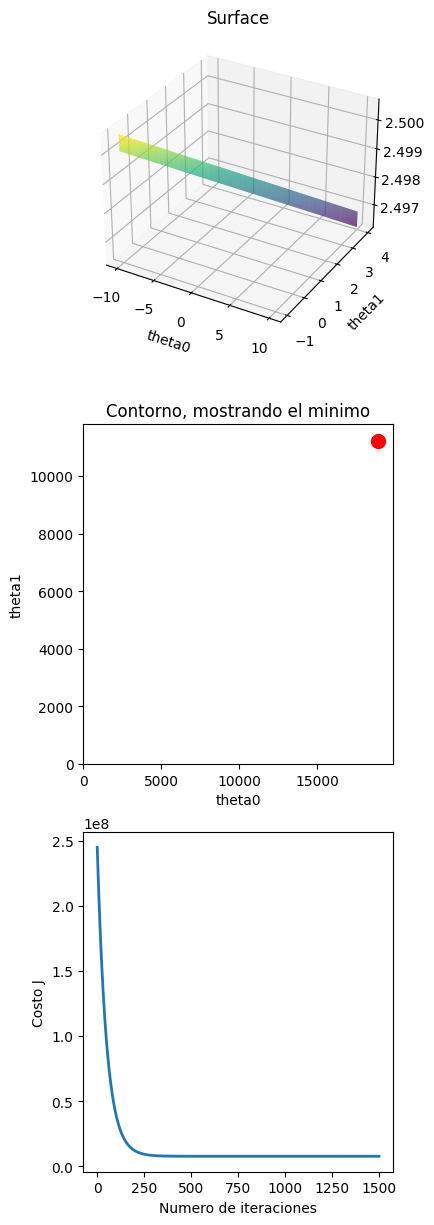

In [237]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass

In [243]:
#X = (X - np.mean(X)) / np.std(X)
# Datos del año 2018
year = 2018

# Normalizar el año 2018 (usando la misma media y desviación estándar que usaste para normalizar los datos de entrenamiento)
X_norm = (year - np.mean(data[1:, 0])) / np.std(data[1:, 0])
X_norm
y_pred = theta[0] + theta[1] * X_norm

print(f"La predicción para el año {year} es: {y_pred}")

La predicción para el año 2018 es: 39631.75270218641
